Text(-106.55555555555556, 0.5, 'Present-day country / territory')

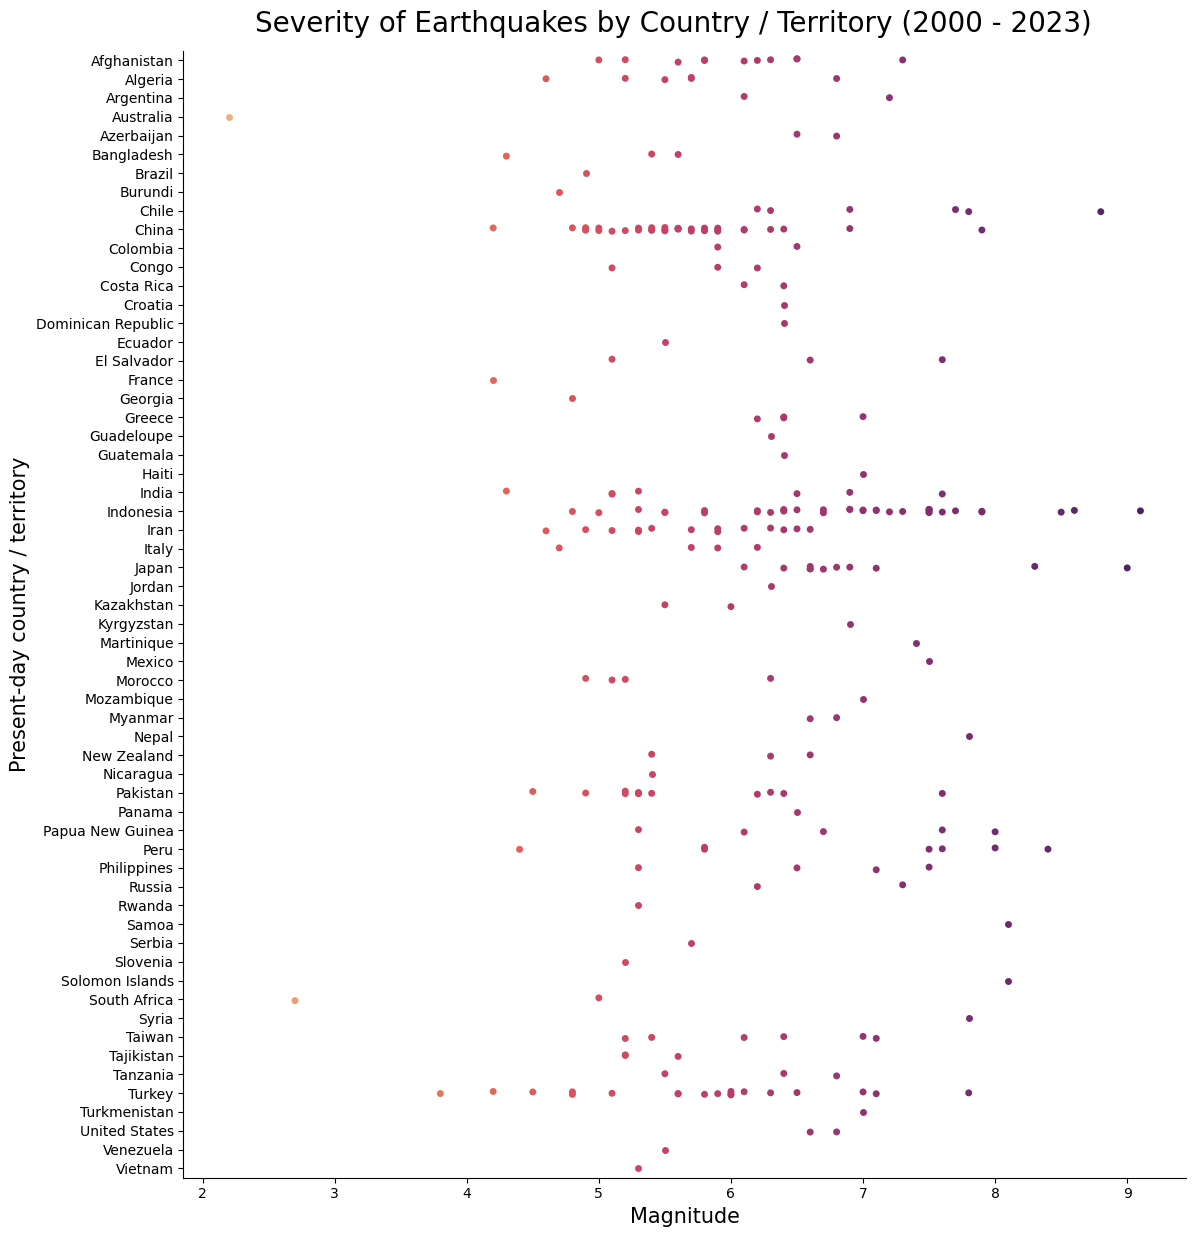

In [2]:
#Import packages needed to extract, load, and transform data
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import requests

#Grab url to scrape data from
url = 'https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900'
opened_webpage = requests.get(url)
bs = BeautifulSoup(opened_webpage.content, "html.parser")

#Find table data to scrape
tables = bs.findAll('table', {'class':"sortable wikitable"})
wiki_table = str(tables[0])

#Convert table into dataframe, save raw data
df = pd.read_html(str(wiki_table))
df = pd.DataFrame(df[0])
#df.to_csv('raw_earthquake_data.csv')


#Begin process of cleaning raw data

#Give dataframe more appropriate name
cleaned_EQ_data = df



#Function to clean and convert numerical datapoints into floating-point numbers.
def clean_numerical_data(s):
    s_list = s.split(" ")
    s = s_list[0]
    converted = float(s)
    return converted


#Function to check if the dataframe lists two countries instead of one. 
    #If so, cuts the second country from the row and adds it to its own row.
def multiple_EQ_loc(df, column):
    for i in range(len(df[column])):
        if "," in df[column][i]:
            s_list = df[column][i].split(" ")
            #print(s_list[1])
            if s_list[1][0] in ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",]:
                df.loc[len(df.index)] = [s_list[1], None, None, None, df["Magnitude"][i], None, None, None, None, None, None] 
                
            p_list = df[column][i].split(",")
            df[column] = df[column].replace(df[column][i], p_list[0])

#Function to remove additional information from the country column past the country name                
def clean_country_name(df, column):
    #Certain countries have multiple words in their name; this is a list of all of them
    exceptions = ["South Africa", "Congo", "Dominican Republic", "United States", "Costa Rica", "New Zealand", "Solomon Islands", "El Salvador"]
    
    #Iterates through all country names
    for i in range(len(df[column])):
        
        #Checks if a country in the dataframe is also in the list.
            #If so, replace the dataframe's listed country name with the one in the list.
        for j in range(len(exceptions)):
            if exceptions[j] in df[column][i]:
                df[column] = df[column].replace(df[column][i], exceptions[j])

        #Check if additional information is listed in parentheses after the country name.
            #If so, they are removed
        if "(" in df[column][i]:
            s_list = df[column][i].split(" ")
            df[column] = df[column].replace(df[column][i], s_list[0])
            


#Clean dataset before transformation

#Cut off the last two empty columns from the dataset
cleaned_EQ_data = cleaned_EQ_data.iloc[:, 1:12]

#Rename the country/territory column into a more succinct name
cleaned_EQ_data.rename(columns = {"Present-day country/territory and link to Wikipedia article":"Present-day country/territory"}, inplace = True)

#Calls function to clean dataset if two countries are listed instead of one
multiple_EQ_loc(cleaned_EQ_data, "Present-day country/territory")

#Converts numerical values into strings so string operations can be performed.
    #Will be converted into floating-point numbers once finished
cleaned_EQ_data["Magnitude"] = cleaned_EQ_data["Magnitude"].astype(str).apply(clean_numerical_data)

#Cleans categorical data by removing unnecessary information after country name
clean_country_name(cleaned_EQ_data, "Present-day country/territory")

#display(cleaned_EQ_data)


#Trims the dataframe to only include values in the last decade
EQ_data_last_decade = cleaned_EQ_data.iloc[1096: , :]
EQ_data_last_decade = EQ_data_last_decade.sort_values("Present-day country/territory")
country = EQ_data_last_decade["Present-day country/territory"]
magnitude = EQ_data_last_decade["Magnitude"]


#Load and visualize table data

#Creates a catplot from earthquake data from the last 10 years. X-axis is magnitude, Y-axis is country/territory
graph = sns.catplot(data = EQ_data_last_decade, x = magnitude, y = country, height=12, hue = magnitude, palette = "flare")
#Small modifications to make graph more appealing to the eyes
graph.figure.suptitle("Severity of Earthquakes by Country / Territory (2000 - 2023)", fontsize = 20, x = 0.56, y = 1.01, verticalalignment = "center")
graph.ax.set_xlabel("Magnitude", fontsize = 15)
graph.ax.set_ylabel("Present-day country / territory", fontsize = 15)
